## **Load library and dataset**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from numpy import mean
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from pandas.core.common import random_state

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **EDA**

Load file from URL

In [ ]:
url = 'https://raw.githubusercontent.com/idontwantbroccolianymore/spring-2022-GR5291-Project/main/data/healthcare-dataset-stroke-data.csv'
train_set_original = pd.read_csv(url, sep=',',index_col='id')

In [ ]:
# Create a copy
train_set = train_set_original.copy()

In [ ]:
# size of the dataset
print("Data dimensions: ",train_set.shape)

Data dimensions:  (5110, 11)


In [ ]:
# names 
print("Data column names: ",train_set.columns.values.tolist())

Data column names:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
# types
train_set.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# overall info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [ ]:
train_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
train_set.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### **a. Check missing data**

In [ ]:
fig = px.imshow(train_set.isna().transpose(),color_continuous_scale="Blues")
plt.savefig('missing_data.png', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
train_set.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As the above checking, only does bmi contain the missing value.

We will fill these rows by the median value.

In [ ]:
train_set['bmi'].fillna(train_set['bmi'].median(), inplace=True)
train_set.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
train_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
train_set.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **b. Check numeric and categorical**

In [ ]:
# overall info
# train_set.info()
# check the categorical and numerical columns exclude "stroke"
categorical_col = train_set.select_dtypes(include='object').columns
numerical_col = train_set.drop(['stroke'], axis=1).select_dtypes(exclude='object').columns
print("Categorical columns: ", categorical_col)
print("Numerical columns: ", numerical_col)


Categorical columns:  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Numerical columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


In [ ]:
# hypertension & heart_disease are shown as numberical but is binary feature (0,1)
# numerical columns do not contain these two features, and categorical columns contain these two festure
numerical_col = numerical_col.drop(['hypertension','heart_disease']).to_list()
categorical_col = categorical_col.to_list()
categorical_col.append('hypertension')
categorical_col.append('heart_disease')
print("Categorical columns after adding binary features: ", categorical_col)
print("Numerical columns after deleting binary features: ", numerical_col)

Categorical columns after adding binary features:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
Numerical columns after deleting binary features:  ['age', 'avg_glucose_level', 'bmi']


In [ ]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


The statistics of numberical data

In [ ]:
# show the statistics of numberical data
train_set[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60


In [ ]:
train_set.groupby('stroke').count() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4861
1,249,249,249,249,249,249,249,249,249,249


### **c. Check uniqueness**

In [ ]:
# model distribution
train_set["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# return is false, so there exist some unique values
np.unique(train_set["stroke"]).size == len(train_set["stroke"])

False

In [ ]:
# function to get unique values
def unique(list):
    x = np.array(list)
    print(np.unique(x))


print("the unique values from stroke is")
unique(train_set["stroke"])

the unique values from stroke is
[0 1]


In [ ]:
# see how many unique values each categorical column has
# there are three unique values in gender, one is "other" for which we deleted later since it only has one value
train_set[categorical_col].nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
hypertension      2
heart_disease     2
dtype: int64

### **d. Check correlation**

In [ ]:
train_set.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


In [ ]:
corr_matrix = train_set.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.036110
Name: stroke, dtype: float64

more fancy one

<Figure size 864x720 with 0 Axes>

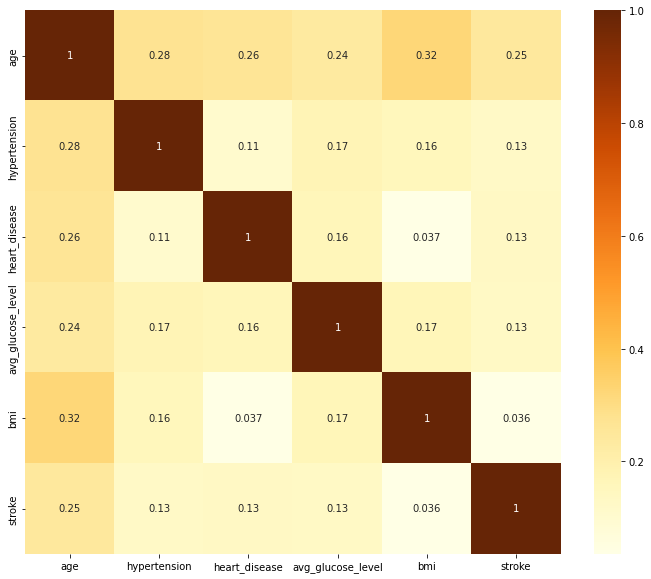

In [ ]:

corrMatrix = train_set.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMatrix, annot=True,cmap="YlOrBr")
#plt.savefig('corraletion.png', dpi=300)
plt.show()

<Figure size 1008x864 with 0 Axes>

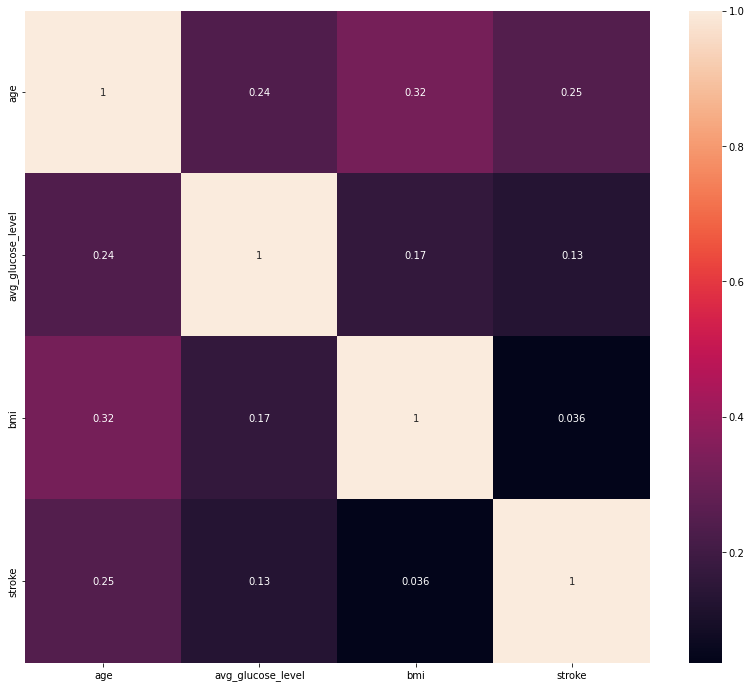

In [ ]:
test = numerical_col.copy()
test.append('stroke')
corrMatrix = train_set[test].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corrMatrix, annot=True)
#plt.savefig('corraletion.png', dpi=300)
plt.show()

correlation coefficient of numerical data

In [ ]:
target=train_set['stroke']

for feature in numerical_col[:]:
    correlation=np.corrcoef(train_set[feature], target)[1][0]
    print(f"{feature} is correlated to stroke by a factor of {np.round(correlation,2)}")

age is correlated to stroke by a factor of 0.25
avg_glucose_level is correlated to stroke by a factor of 0.13
bmi is correlated to stroke by a factor of 0.04


### **e. Distribution of Numerical data**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ca244f50>,
      dtype=object)

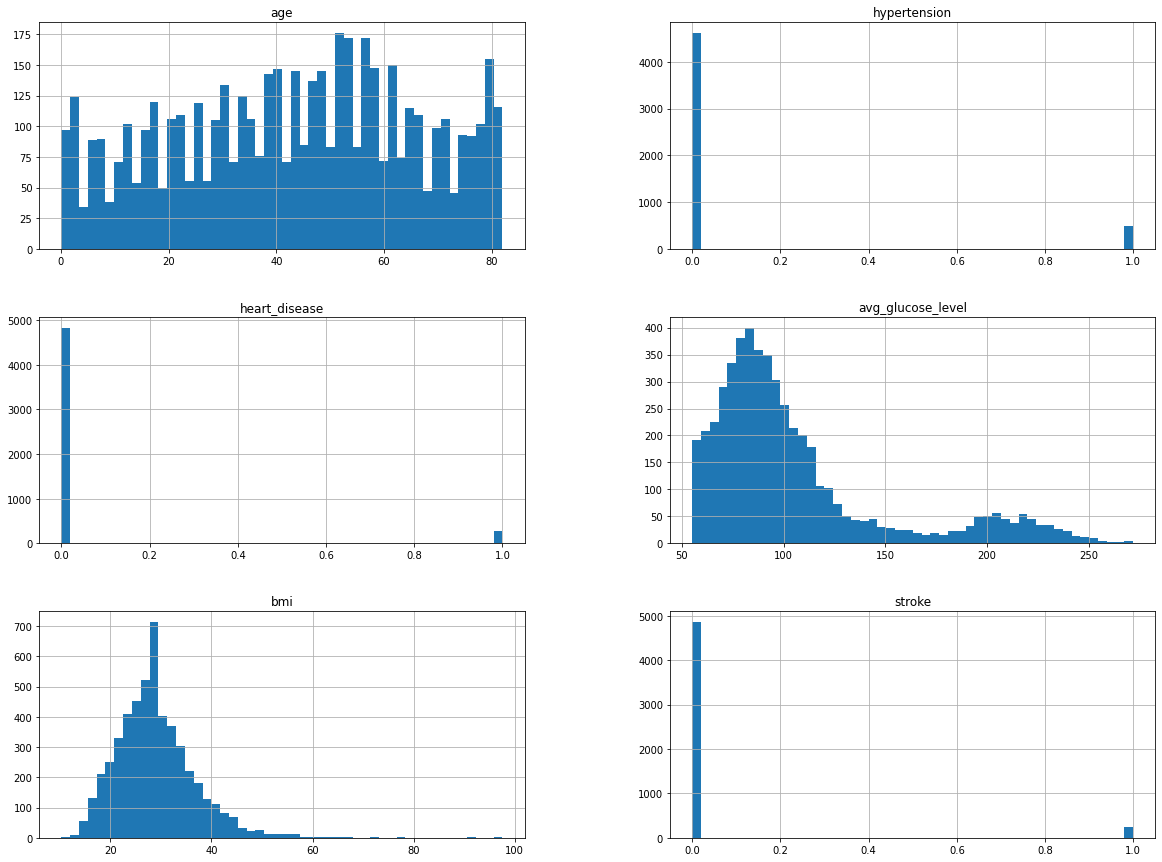

In [ ]:
train_set.hist(bins=50,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7c9ccb710>,
      dtype=object)

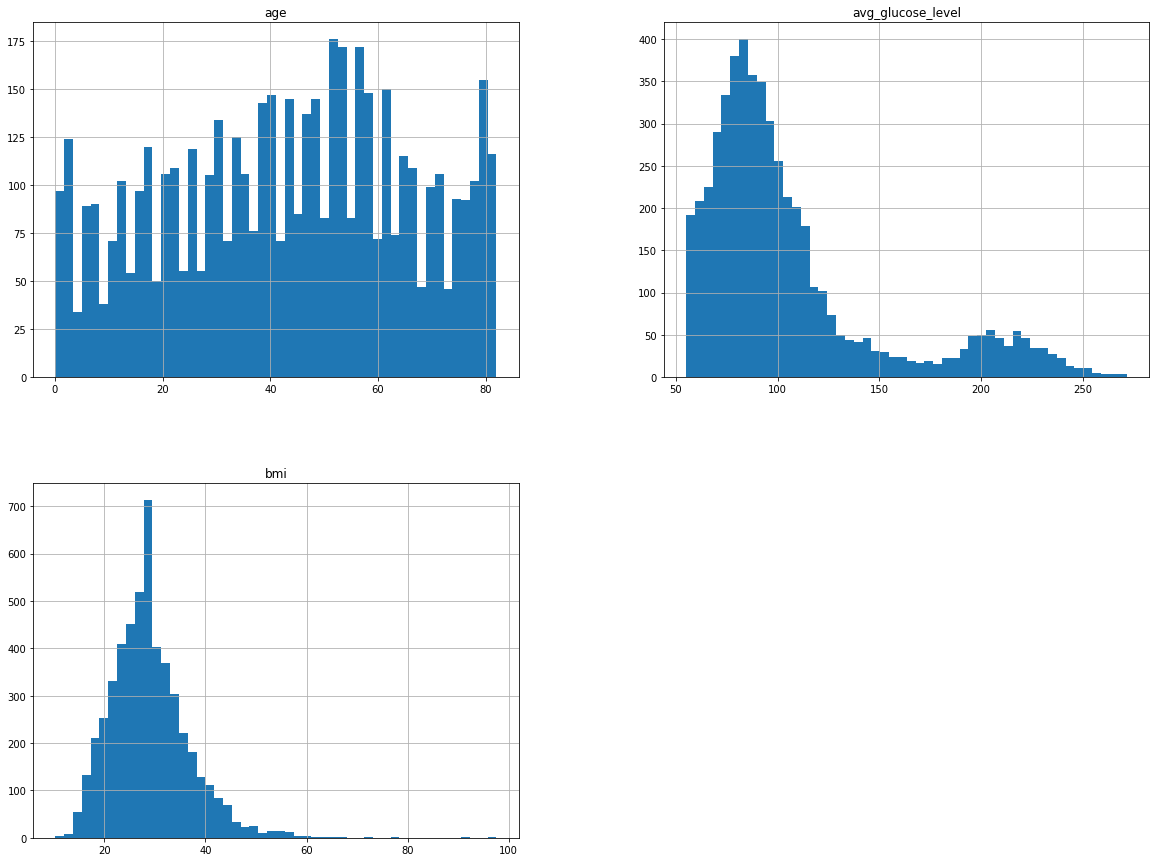

In [ ]:
train_set[numerical_col].hist(bins=50,figsize=(20,15))

Text(0.5, 0.98, 'Numerical Data Distribution')

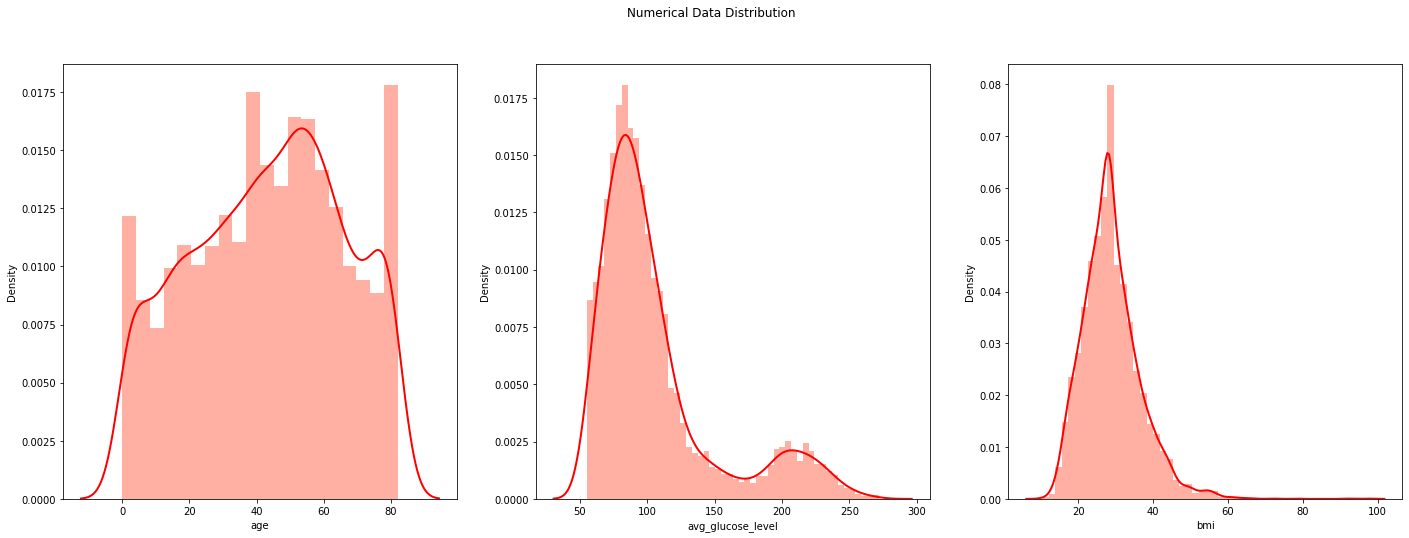

In [ ]:
k=1
fig = plt.figure(figsize=(24,8))
fig.suptitle("Numerical Data Distribution")

for col,k in zip(numerical_col,np.arange(1,len(numerical_col)+1)):
    ax = fig.add_subplot(1,3,k)
    sns.distplot(train_set[col], ax=ax,kde=True, kde_kws={ "color":'r', "alpha": 1, "linewidth":2 }, hist_kws={ "linewidth": 3,
                            "alpha": 0.5, "color": "tomato"} )
    
    fig.show()
#plt.savefig('numerical_data_distribution.png', dpi=300)

### **f. Distribution of Categorical data**

Categorical Data Distribution (contain stroke)

We could use pie chart to have a more clear view on the categorical data

**'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke'**

In [ ]:
# make a copy
cat_withstroke = categorical_col.copy()

In [ ]:
cat_withstroke.append("stroke")

Text(0.5, 0.98, 'Categorical Data Distribution')

Text(0.5, 1.0, 'gender')

Text(0.5, 1.0, 'ever_married')

Text(0.5, 1.0, 'work_type')

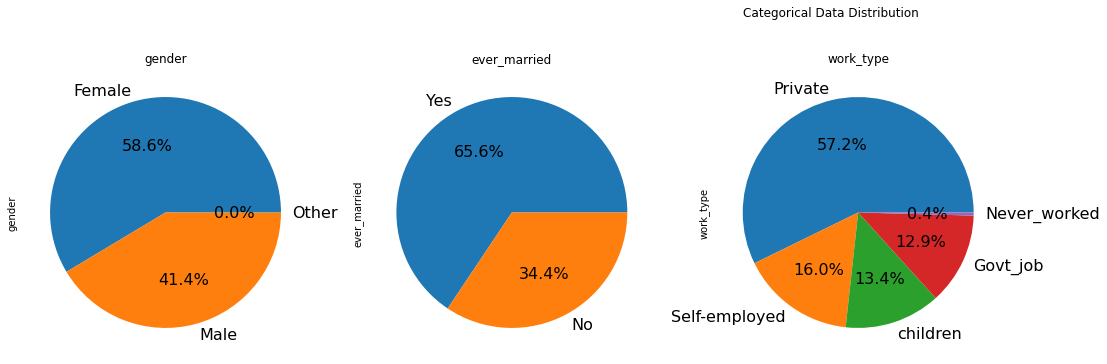

In [ ]:
k=1
fig = plt.figure(figsize=(30,6))
fig.suptitle("Categorical Data Distribution")
for col,k in zip(cat_withstroke,np.arange(1,len(cat_withstroke)+1)):
  if ((k/2)<2):
    ax = fig.add_subplot(1,5,k)
    train_set[col].value_counts().plot.pie(autopct='%1.1f%%',fontsize=16)
    ax.set_title(col)
  fig.show()
#plt.savefig('categorical_data_distribution.png')

Text(0.5, 0.98, 'Categorical Data Distribution')

Text(0.5, 1.0, 'Residence_type')

Text(0.5, 1.0, 'smoking_status')

Text(0.5, 1.0, 'hypertension')

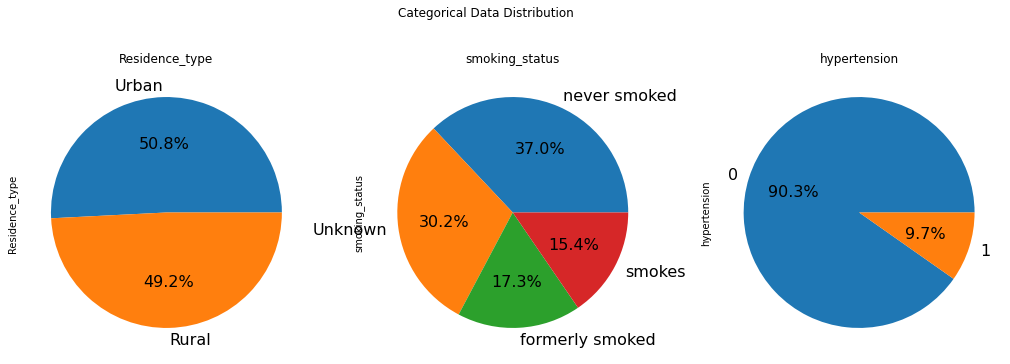

In [ ]:
k=1
fig = plt.figure(figsize=(30,6))
fig.suptitle("Categorical Data Distribution")
for col,k in zip(cat_withstroke,np.arange(1,len(cat_withstroke)+1)):
  if (1.5<(k/2)<=3):
    ax = fig.add_subplot(1,5,k-2)
    train_set[col].value_counts().plot.pie(autopct='%1.1f%%',fontsize=16)
    ax.set_title(col)
  fig.show()
#plt.savefig('categorical_data_distribution.png')

Text(0.5, 0.98, 'Categorical Data Distribution')

Text(0.5, 1.0, 'heart_disease')

Text(0.5, 1.0, 'stroke')

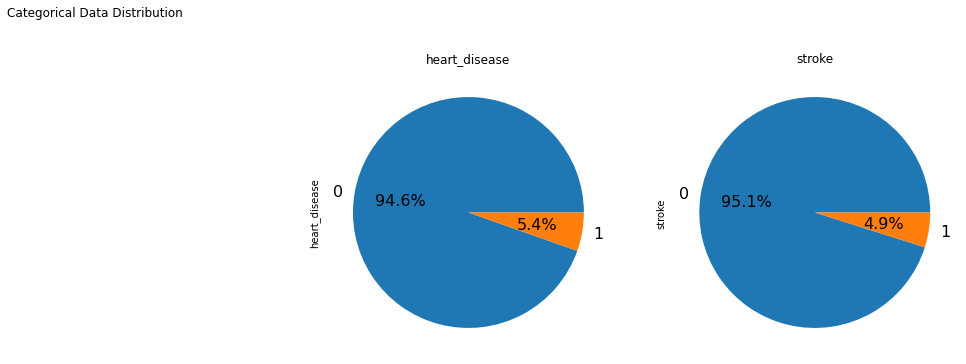

In [ ]:
k=1
fig = plt.figure(figsize=(30,6))
fig.suptitle("Categorical Data Distribution")
for col,k in zip(cat_withstroke,np.arange(1,len(cat_withstroke)+1)):
  if (3<(k/2)):
    ax = fig.add_subplot(1,5,k-3)
    train_set[col].value_counts().plot.pie(autopct='%1.1f%%',fontsize=16)
    ax.set_title(col)
  fig.show()

#plt.savefig('categorical_data_distribution2.png')

### **g. Exploratory Analysis**

Numerical Data distribution(group by stroke)

[Text(0.5, 0, '')]

[Text(0.5, 0, '')]

Text(0.5, 1.0, 'No Stroke vs Stroke by Age')

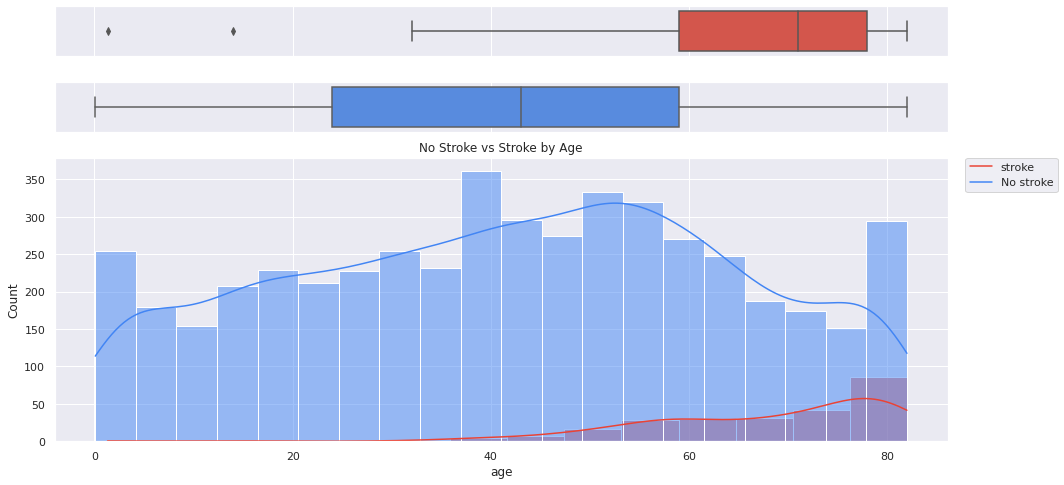

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=train_set[train_set['stroke']==1]["age"], ax=ax_box1, color="#ea4335")
sns.histplot(train_set[train_set['stroke']==1], x="age", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=train_set[train_set['stroke']==0]["age"], ax=ax_box2, color='#4285f4')
sns.histplot(train_set[train_set['stroke']==0], x="age", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['stroke', 'No stroke'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.title('No Stroke vs Stroke by Age')
#plt.savefig('age.png', dpi=300)
plt.show()

[Text(0.5, 0, '')]

[Text(0.5, 0, '')]

Text(0.5, 1.0, 'No Stroke vs Stroke by Avg Glucose Level')

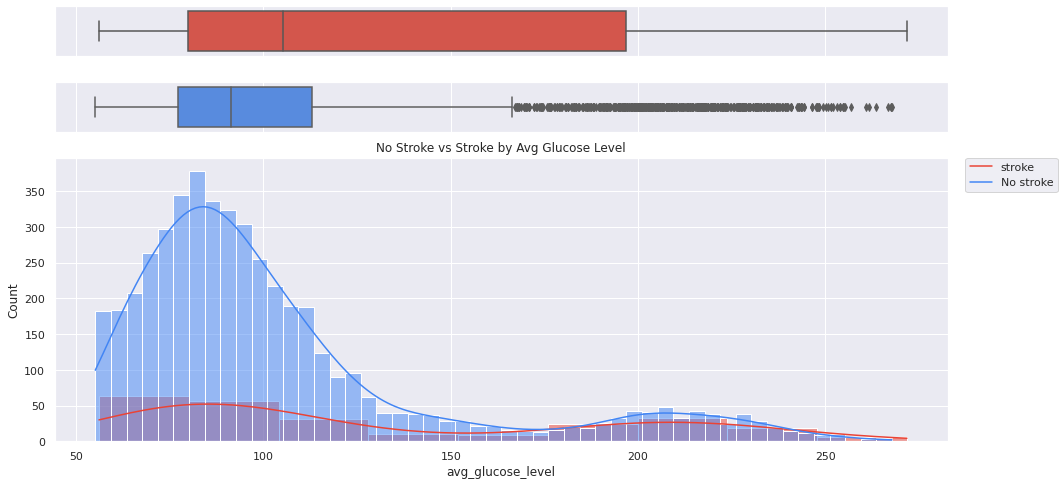

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=train_set[train_set['stroke']==1]["avg_glucose_level"], ax=ax_box1, color="#ea4335")
sns.histplot(train_set[train_set['stroke']==1], x="avg_glucose_level", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=train_set[train_set['stroke']==0]["avg_glucose_level"], ax=ax_box2, color='#4285f4')
sns.histplot(train_set[train_set['stroke']==0], x="avg_glucose_level", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['stroke', 'No stroke'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.title('No Stroke vs Stroke by Avg Glucose Level')
#plt.savefig('avg_glucose_level.png', dpi=300)
plt.show()

[Text(0.5, 0, '')]

[Text(0.5, 0, '')]

Text(0.5, 1.0, 'No Stroke vs Stroke by BMI')

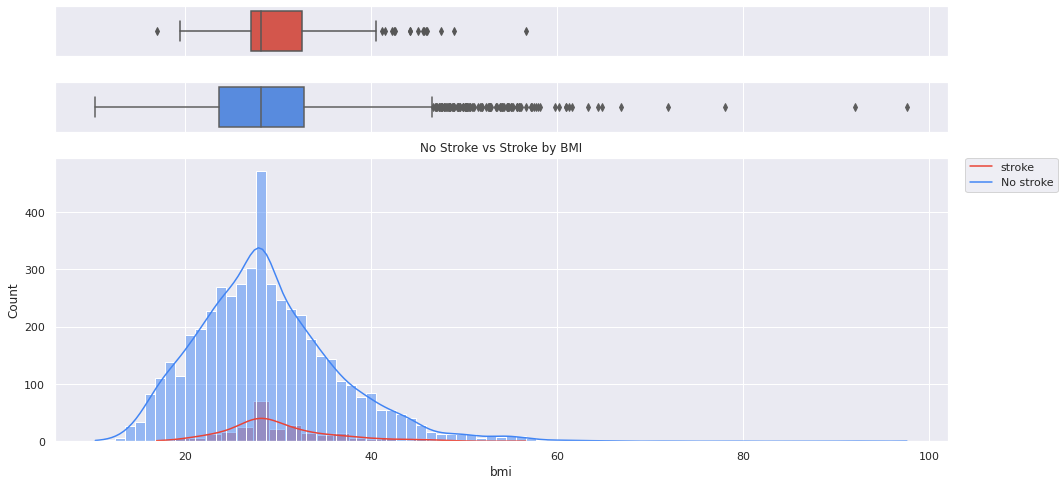

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=train_set[train_set['stroke']==1]["bmi"], ax=ax_box1, color="#ea4335")
sns.histplot(train_set[train_set['stroke']==1], x="bmi", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=train_set[train_set['stroke']==0]["bmi"], ax=ax_box2, color='#4285f4')
sns.histplot(train_set[train_set['stroke']==0], x="bmi", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['stroke', 'No stroke'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.title('No Stroke vs Stroke by BMI')
#plt.savefig('bmi.png', dpi=300)
plt.show()

Categorical Data distribution(group by stroke)

In [ ]:
categorical_col


['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

Text(0.5, 0.98, 'Categorical Data Distribution (group by stroke)')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

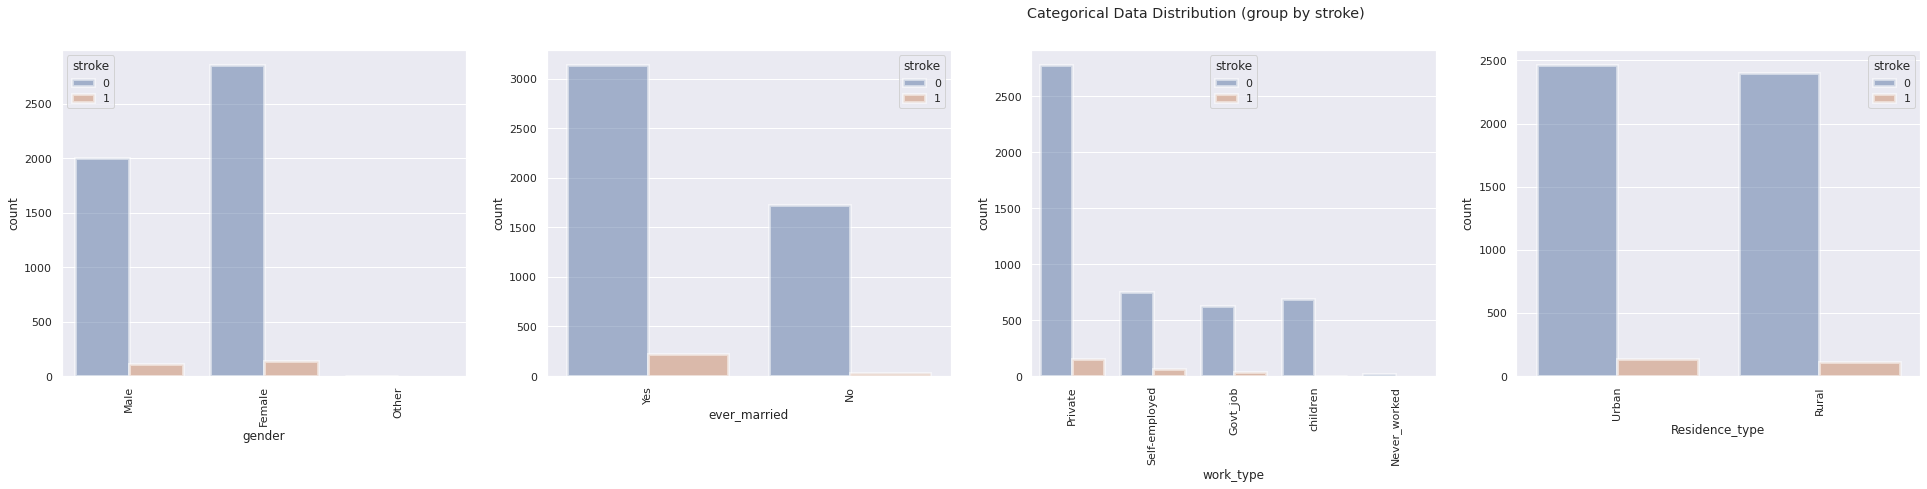

In [ ]:
k=1
fig = plt.figure(figsize=(42,6))
fig.suptitle("Categorical Data Distribution (group by stroke)")

for col,k in zip(categorical_col,np.arange(1,len(categorical_col)+1)):
  if ((k/2)<2.5):
    ax = fig.add_subplot(1,5,k)
    sns.countplot(train_set[col], ax=ax, linewidth= 3, alpha= 0.5, hue=train_set['stroke'])
    plt.xticks(rotation=90)
    #fig.tight_layout()
  fig.show()
#plt.savefig('cdd1.png', dpi=300)

Text(0.5, 0.98, 'Categorical Data Distribution (group by stroke)')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

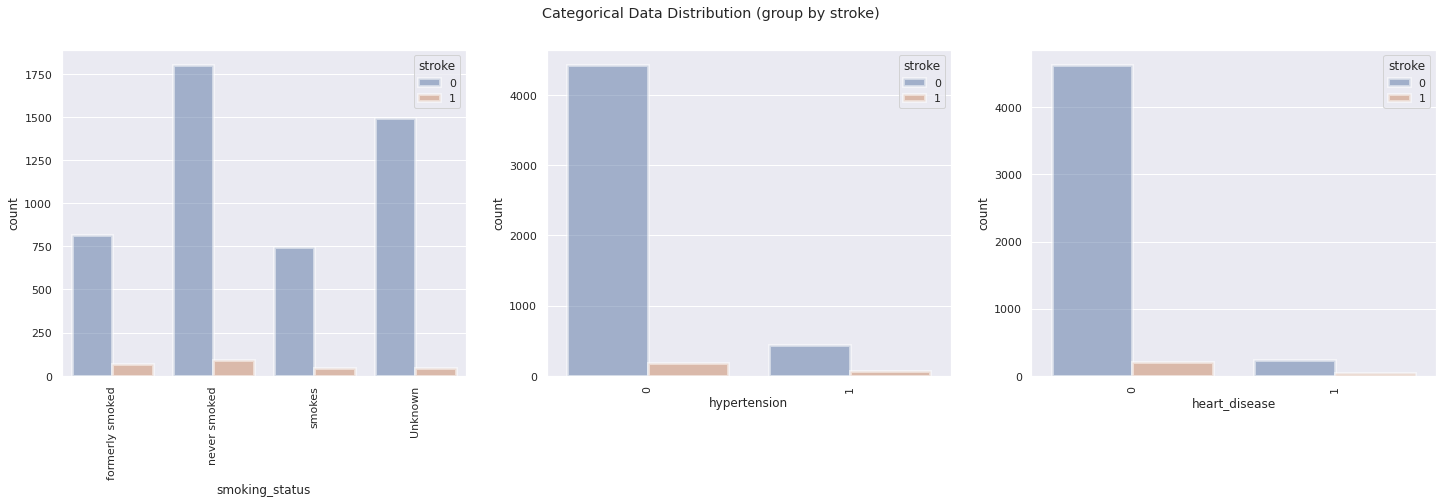

In [ ]:
k=1
fig = plt.figure(figsize=(42,6))
fig.suptitle("Categorical Data Distribution (group by stroke)")

for col,k in zip(categorical_col,np.arange(1,len(categorical_col)+1)):
  if ((k/2)>2):
    ax = fig.add_subplot(1,5,k-3)
    sns.countplot(train_set[col], ax=ax, linewidth= 3, alpha= 0.5, hue=train_set['stroke'])
    plt.xticks(rotation=90)
  fig.show()
#plt.savefig('cdd2.png', dpi=300)

### **h. Encoding & Data cleaning**



*   Only one observation in gender is Other, we will drop this special case


In [ ]:
# Only one observation in gender is Other, drop it
df = train_set.copy()
df.drop(df.index[df['gender'] == 'Other'], inplace = True)
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
df.shape

(5109, 11)

In [ ]:

# Encoding: category -> number
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
df.head()
#print(df.index[df['work_type'] == 'children'])
#print(df.index[df['work_type'] == 'Govt_job'])
#print(df.index[df['work_type'] == 'Never_worked'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
for col in categorical_col:
    df[col] = encoder.fit_transform(df[col])

df.head()
#print(df.index[df['work_type'] == 1])#df[11],df[253])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1




1.   Gender: Female=0 Male=1
2.   Ever_married: No=0 Yes=1
3.   work_type: Govt_job=0 Never_worked=1 Private=2 Self-employed=3 children=4
4.   Residence_type: Rural=0 Urban=1
5.   smoking_status: Unknown=0 formerly smoked=1 never smoked=2 smokes=3



In [ ]:
'''corrMatrix = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corrMatrix, annot=True)
#plt.savefig('corraletion.png', dpi=300)
plt.show()'''

"corrMatrix = df.corr()\nplt.figure(figsize=(14,12))\nsns.heatmap(corrMatrix, annot=True)\n#plt.savefig('corraletion.png', dpi=300)\nplt.show()"

### **i. Dealing with Unbalanced Dataset**

In [ ]:
len(df[df['stroke']==1])

249

In [ ]:
len(df[df['stroke']==0])

4860

Since we are interested in the stroke sample, so we keep all the result of stroke exist and undersampling the non-stroke amount to create a balanced sample

Undersampling: randomly choosing 249 data from a subset(stroke =0) to construct a balanced dataset

In [ ]:
# undersampling
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)

# Collect statistics on the current category proportion
print("Before undersampling: ", Counter(y_train))

# undersample
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=0)

# obtained undersampling
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Statistical undersampling category proportion
print("After undersampling: ", Counter(y_train_under))

# test SVC
model=SVC()

clf = model.fit(X_train, y_train)
pred = clf.predict(X_test)
print("ROC AUC score for original data: ", roc_auc_score(y_test, pred))

clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Before undersampling:  Counter({0: 2904, 1: 161})
After undersampling:  Counter({0: 161, 1: 161})
ROC AUC score for original data:  0.5
ROC AUC score for undersampled data:  0.7600622792340584


we also did the oversampling to expand the stroke=1 amount to correlated to the non-stroke one to create a balanced sample with more data values

Oversampling ↓

In [ ]:
# SMOTE oversampling
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)

# Collect statistics on the current category proportion
print("Before oversampling: ", Counter(y_train))

SMOTE = SMOTE(random_state=0)

# obtained oversampling
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#Statistical oversampling category proportion
print("After oversampling: ",Counter(y_train_SMOTE))

#  SVC
model=SVC()

clf = model.fit(X_train, y_train)
pred = clf.predict(X_test)
print("ROC AUC score for original data: ", roc_auc_score(y_test, pred))

clf_SMOTE= model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)
print("ROC AUC score for oversampling data: ", roc_auc_score(y_test, pred_SMOTE))

Before oversampling:  Counter({0: 2924, 1: 141})
After oversampling:  Counter({1: 2924, 0: 2924})
ROC AUC score for original data:  0.5
ROC AUC score for oversampling data:  0.7583888123660851


So we could have two balanced datasets.


*   Small dataset from undersampling
*   Large dataset from oversampling



In [ ]:
# obtained undersampling
X_train_under, y_train_under = undersample.fit_resample(X, y)
print("After undersampling: ",Counter(y_train_under))
# small sample
ss=pd.concat([X_train_under,y_train_under],axis=1)
ss

After undersampling:  Counter({0: 249, 1: 249})


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,12.0,0,0,0,4,1,67.06,16.1,0,0
1,0,52.0,0,0,1,0,1,80.88,23.8,3,0
2,0,81.0,1,0,1,0,1,216.07,43.4,2,0
3,1,42.0,0,0,1,2,1,68.24,33.1,1,0
4,0,61.0,0,0,1,2,0,71.40,29.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
493,1,57.0,0,0,1,2,0,84.96,36.7,0,1
494,0,14.0,0,0,0,4,0,57.93,30.9,0,1
495,0,75.0,0,0,1,3,0,78.80,29.3,1,1
496,1,71.0,1,0,1,3,0,87.80,28.1,0,1


In [ ]:

# obtained oversampling
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X, y)
print("After oversampling: ",Counter(y_train_SMOTE))
# large sample
ls=pd.concat([X_train_SMOTE,y_train_SMOTE],axis=1)
ls

After oversampling:  Counter({1: 4860, 0: 4860})


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,0,61.000000,0,0,1,3,0,202.210000,28.100000,2,1
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9715,1,69.484878,0,0,1,3,1,195.200907,28.845488,2,1
9716,0,78.000000,0,0,1,2,0,109.144693,31.062152,1,1
9717,0,71.807701,0,0,1,2,0,193.460552,35.069241,1,1
9718,0,61.737350,0,0,1,0,0,206.147048,41.852771,1,1


**For the following modules, we would use both small sample and large sample**


*   **small sample variable: ss**
*   **large sample variable: ls**



# **Feature Engineering**

Before doing further analysis, we find three numeric features are in the quite difference range. Hence we need to normalize them.

In [ ]:
small = ss.copy()
large = ls.copy()

In [ ]:
X_small = small.iloc[:,0:10]
y_small = small['stroke']
X_large = large.iloc[:,0:10]
y_large = large['stroke']

In [ ]:
ss.describe()[['age','avg_glucose_level', 'bmi']].T[['min', 'max']]

,min,max
age,0.56,82.00
avg_glucose_level,55.22,271.74
bmi,15.30,56.60


In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    ss[col] = (ss[col]- ss[col].min())/(ss[col].max() - ss[col].min())

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
ss.describe()[['age','avg_glucose_level', 'bmi']].T[['min', 'max']]

,min,max
age,0.0,1.0
avg_glucose_level,0.0,1.0
bmi,0.0,1.0


In [ ]:
ls.describe()[['age','avg_glucose_level', 'bmi']].T[['min', 'max']]

,min,max
age,0.08,82.00
avg_glucose_level,55.12,271.74
bmi,10.30,97.60


In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    ls[col] = (ls[col]-ls[col].min())/(ls[col].max()-ls[col].min())

In [ ]:
ls.describe()[['age','avg_glucose_level', 'bmi']].T[['min', 'max']]

,min,max
age,0.0,1.0
avg_glucose_level,0.0,1.0
bmi,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_ss = ss.iloc[:,0:10]
y_ss = ss['stroke']
X_sstrain,X_sstest,y_sstrain,y_sstest = train_test_split(X_ss,y_ss,random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_ls = ls.iloc[:,0:10]
y_ls = ls['stroke']
X_lstrain,X_lstest,y_lstrain,y_lstest = train_test_split(X_ls,y_ls,random_state=0)

### **PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_ssreduced = pca.fit_transform(X_sstrain)  #components
X_ssreduced_test = pca.fit_transform(X_sstest)

Text(0.5, 1.0, 'Data After PCA')

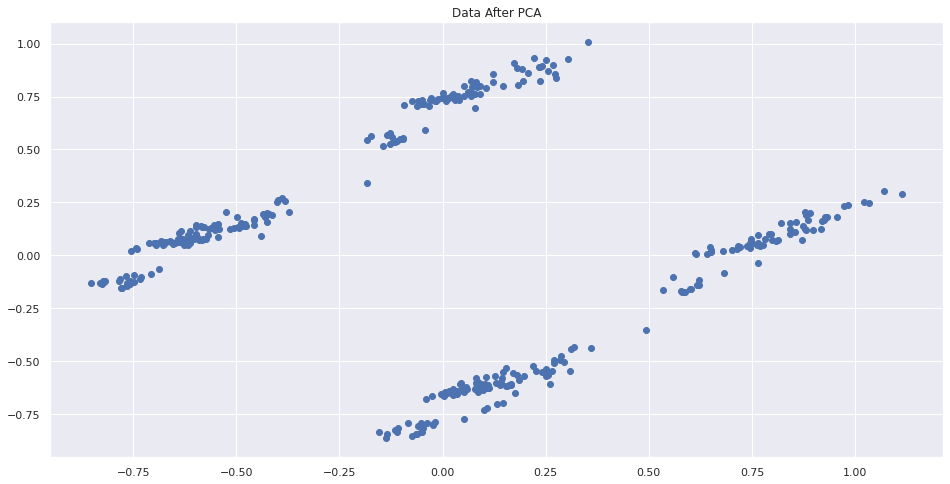

In [ ]:
pc1 = X_ssreduced[:,3]
pc2 = X_ssreduced[:,2]

plt.scatter(pc1, pc2)
plt.title('Data After PCA')
plt.show()

In [ ]:
# scree plot function. 

def scree_plot(pca):
  # define percentage contribution of each variance. 

  num_components = len(pca.explained_variance_ratio_)

  index = np.arange(num_components)

  values = pca.explained_variance_ratio_

  # define the graph
  plt.figure(figsize=(18, 6))
  ax = plt.subplot(111)
  cumulative = np.cumsum(values)

  ax.bar(index, values)
  ax.plot(index, cumulative)

  # add annotation to our graph. 
  for val in range(num_components):
    ax.annotate(r"%s" % ((str(values[val]*100)[:3])), (index[val], values[val]), 
                va = 'bottom', ha = 'center', fontsize = 16)

  # setting tick parameteris 
  ax.xaxis.set_tick_params(width=1)
  ax.yaxis.set_tick_params(width =3, length=15)

  # labeling x and y axis
  ax.set_xlabel('Principal Component Values')
  ax.set_ylabel('Variance Explained Percentage')
  plt.title('Scree plot of variance explained ratio for each principal component')

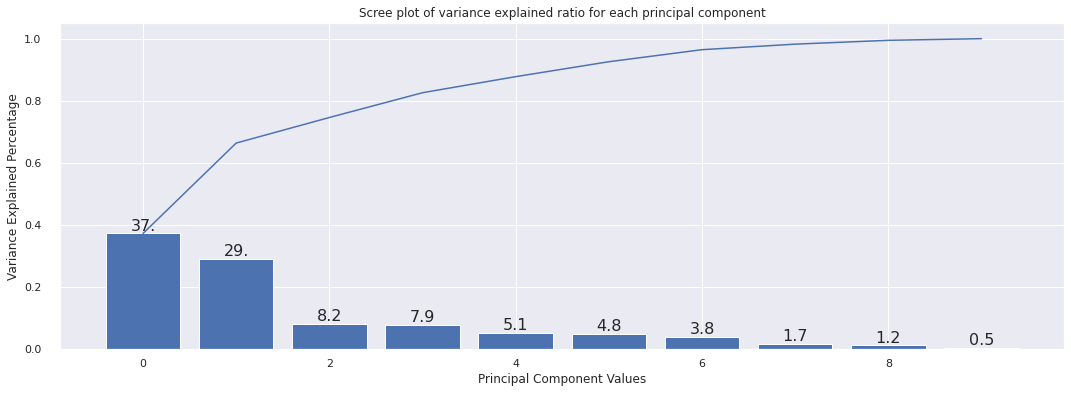

In [ ]:
scree_plot(pca)

Text(0.5, 0, 'Principal Components')

Text(0, 0.5, 'Variance Explained')

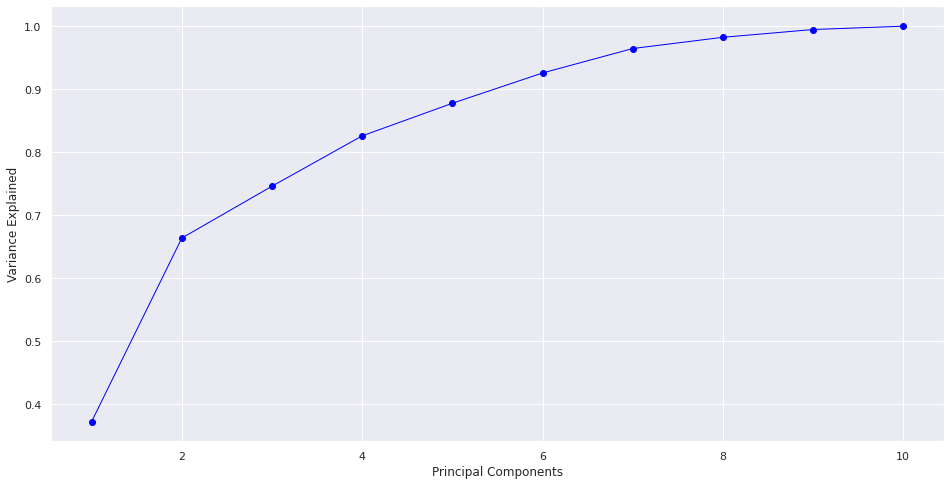

In [ ]:
cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cum_explained_var)+1), cum_explained_var, 'o-', linewidth=1, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
'''
from sklearn.decomposition import PCA

pca_ls = PCA()
X_lsreduced = pca_ls.fit_transform(X_lstrain)
ls_cum_explained_var = np.cumsum(pca_ls.explained_variance_ratio_)
plt.plot(range(1,len(ls_cum_explained_var)+1), ls_cum_explained_var, 'o-', linewidth=1, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()
'''

"\nfrom sklearn.decomposition import PCA\n\npca_ls = PCA()\nX_lsreduced = pca_ls.fit_transform(X_lstrain)\nls_cum_explained_var = np.cumsum(pca_ls.explained_variance_ratio_)\nplt.plot(range(1,len(ls_cum_explained_var)+1), ls_cum_explained_var, 'o-', linewidth=1, color='blue')\nplt.xlabel('Principal Components')\nplt.ylabel('Variance Explained')\nplt.show()\n"

Text(0, 0.5, 'Variation')

Text(0.5, 0, 'PCA Components')

Text(0.5, 1.0, 'PCA Components\nRanked by Variation')

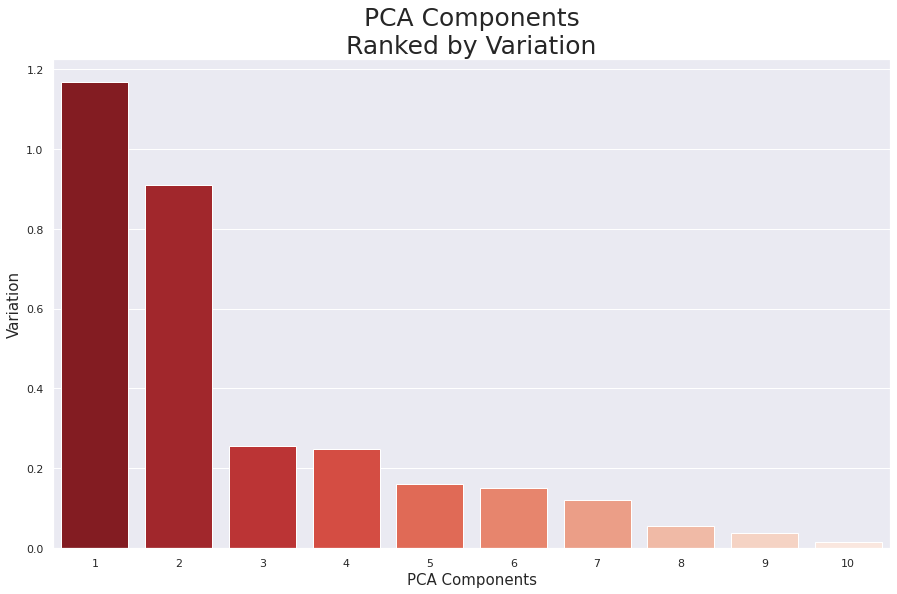

In [ ]:
fig = plt.figure(figsize=(15,9))
sns.barplot(x= list(range(1,11)),y = pca.explained_variance_, palette = 'Reds_r')
plt.ylabel('Variation',fontsize=15)
plt.xlabel('PCA Components',fontsize=15)
plt.title("PCA Components\nRanked by Variation",fontsize=25)
plt.show()

In [ ]:
pca.explained_variance_

array([1.16588434, 0.91002672, 0.25721754, 0.24961202, 0.16164409,
       0.15020099, 0.12125152, 0.05571139, 0.03859817, 0.016506  ])

### **LASSO**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# first without regularization
logr = LogisticRegression(C=100, penalty="l1", solver="liblinear", random_state=123)

logr.fit(X_sstrain, y_sstrain) 

sorted_tuples = sorted(list(zip(X_sstrain.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True) 
for feature,coef in sorted_tuples:
  print(f'{feature:30s} : {coef: 0.3f}')

LogisticRegression(C=100, penalty='l1', random_state=123, solver='liblinear')

age                            :  6.550
heart_disease                  :  0.309
Residence_type                 :  0.287
avg_glucose_level              :  0.168
hypertension                   :  0.151
bmi                            :  0.075
gender                         :  0.054
work_type                      :  0.040
smoking_status                 : -0.106
ever_married                   : -0.500


In [ ]:
# then with lasso
logr = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", random_state=123)

logr.fit(X_ss, y_ss) 

sorted_tuples = sorted(list(zip(X_sstrain.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True) 
for feature,coef in sorted_tuples:
  print(f'{feature:30s} : {coef: 0.3f}')



LogisticRegression(C=0.1, penalty='l1', random_state=123, solver='liblinear')

age                            :  2.922
gender                         :  0.000
hypertension                   :  0.000
heart_disease                  :  0.000
ever_married                   :  0.000
Residence_type                 :  0.000
avg_glucose_level              :  0.000
bmi                            :  0.000
smoking_status                 : -0.079
work_type                      : -0.114


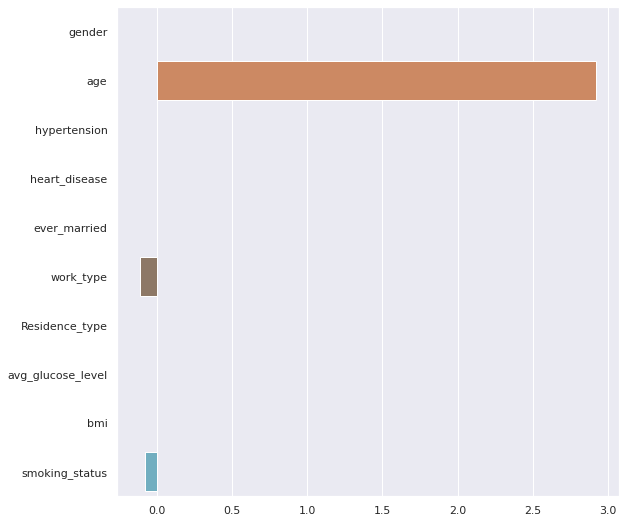

In [ ]:

fig = plt.figure(figsize=(9,9))
sns.barplot(x = logr.coef_[0], y = X_sstrain.columns.values)



In [ ]:
# which columns were kept?
X_sstrain.columns[logr.coef_[0] != 0]

Index(['age', 'work_type', 'smoking_status'], dtype='object')

LogisticRegression(C=0.1, penalty='l1', random_state=123, solver='liblinear')

age                            :  7.040
avg_glucose_level              :  1.362
bmi                            :  0.000
smoking_status                 : -0.329
work_type                      : -0.347
gender                         : -0.770
ever_married                   : -0.842
hypertension                   : -0.858
Residence_type                 : -0.878
heart_disease                  : -0.951


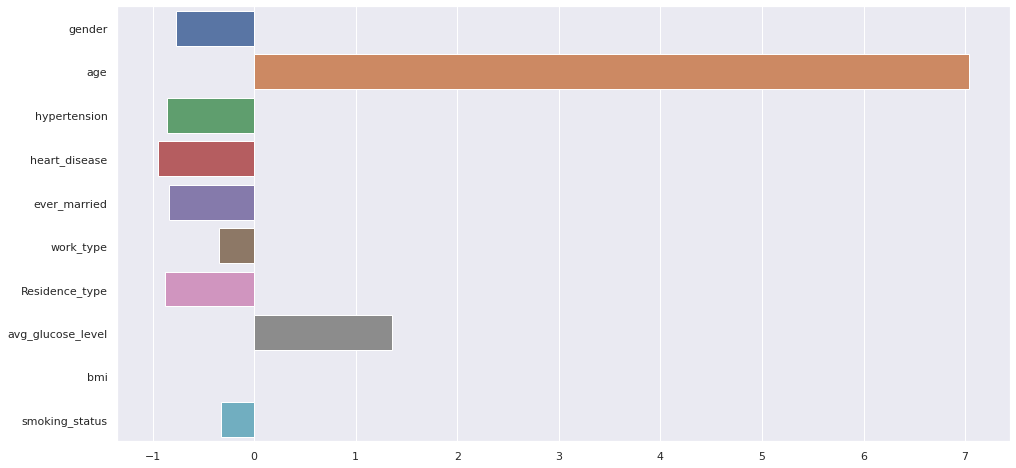

In [ ]:
# then with lasso
logr = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", random_state=123)

logr.fit(X_ls, y_ls) 

sorted_tuples = sorted(list(zip(X_lstrain.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True) 
for feature,coef in sorted_tuples:
  print(f'{feature:30s} : {coef: 0.3f}')

  
sns.barplot(x = logr.coef_[0], y = X_lstrain.columns.values)


In [ ]:
# which columns were kept?
X_lstrain.columns[logr.coef_[0] != 0]

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status'],
      dtype='object')

### **Recursive Feature Elimination**


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## unstandard small set
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=6, step=1, verbose=5)
rfe_selector.fit(X_small, y_small )
rfe_support = rfe_selector.get_support()
rfe_feature = X_small.loc[:,rfe_support].columns.tolist()

print('\n', (len(rfe_feature)), 'selected features: ', str(rfe_feature))

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=5)


 6 selected features:  ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']


In [ ]:
# Create the RFE object and rank each pixel
rfe = RFE(estimator= LogisticRegression(), n_features_to_select=6)
rfe.fit(X_small, y_small )
rfe_support = rfe.get_support()
rfe_feature = X_small.loc[:,rfe_support].columns.tolist()
rfe_feature

RFE(estimator=LogisticRegression(), n_features_to_select=6)

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type']

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_small, y_small)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (accuracy)')

Text(0.5, 1.0, 'Plot for undersampling data')

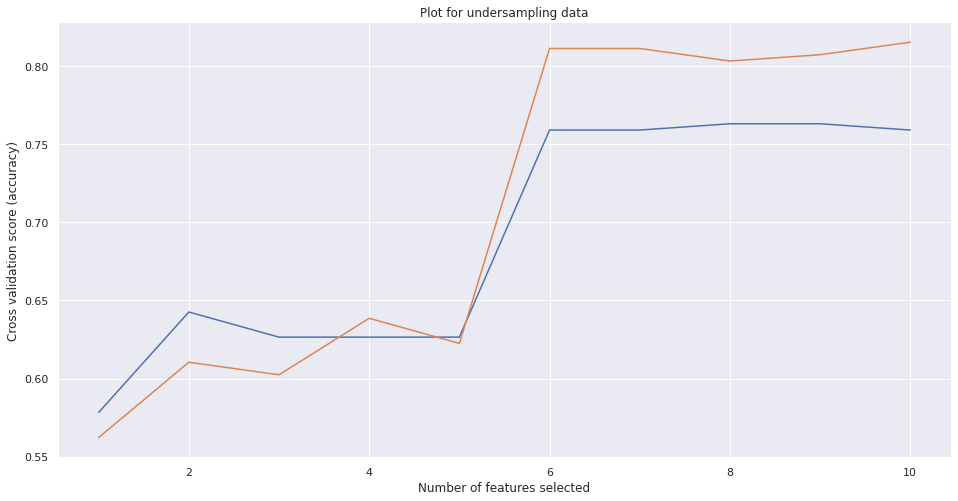

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,)
plt.title('Plot for undersampling data')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_large, y_large)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [ ]:
rfecv.feature_names_in_[:8]

array(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level'], dtype=object)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (accuracy)')

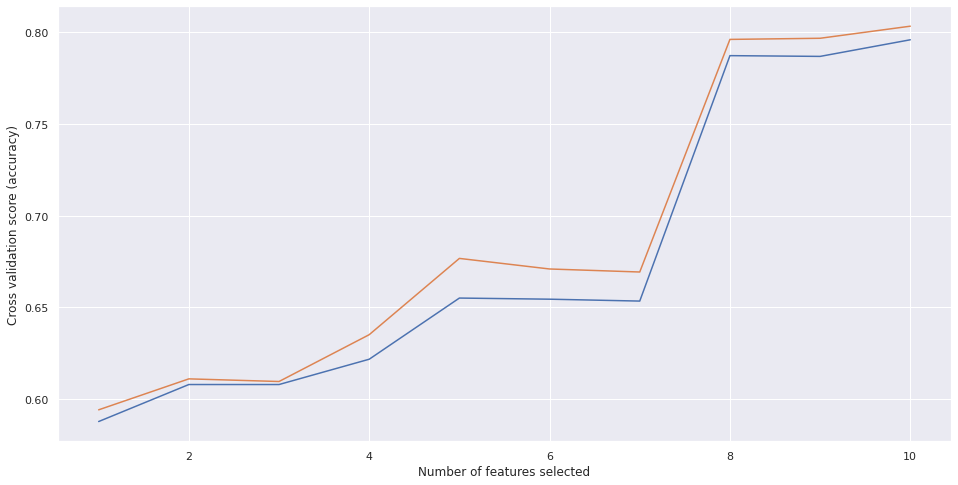

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,)
plt.show()

In [ ]:
## normalized large set

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=10, verbose=5)
rfe_selector.fit(X_ls, y_ls)
rfe_support = rfe_selector.get_support()
rfe_feature = X_ls.loc[:,rfe_support].columns.tolist()

print('\n', (len(rfe_feature)), 'selected features: ', str(rfe_feature))

Fitting estimator with 10 features.


RFE(estimator=LogisticRegression(), n_features_to_select=5, step=10, verbose=5)


 5 selected features:  ['age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level']


### **Ridge** (just include here, do not use)

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Feature importances via coefficients')

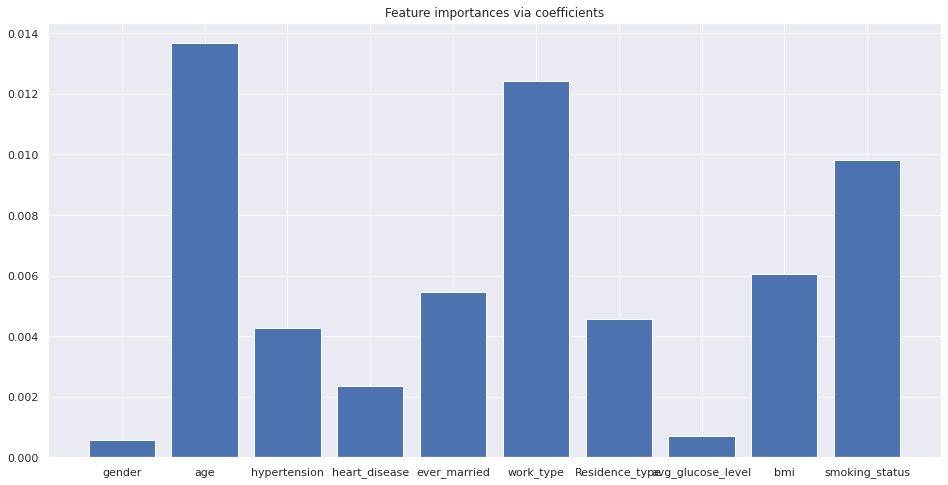

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
## unstandard small set
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_small, y_small) 
importance = np.abs(ridge.coef_)
feature_names = X_small.columns.values
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
feature_importances = pd.Series(importance ,feature_names) 
feature_importances.sort_values(ascending=False).round(3)

age                  0.014
work_type            0.012
smoking_status       0.010
bmi                  0.006
ever_married         0.005
Residence_type       0.005
hypertension         0.004
heart_disease        0.002
avg_glucose_level    0.001
gender               0.001
dtype: float64

### **Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
This method uses the chi-squared (chi²) statistical test for non-negative features to features.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## unstandard small set
## use chi-square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_small,y_small)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_small.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['ss_Features','chi2 Score']  
df1 = pd.DataFrame(featureScores.nlargest(10,'chi2 Score')).reset_index(drop=True)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## unstandard large set
## use chi-square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_large,y_large)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_large.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['ls_Features','chi2 Score']  
df2 = pd.DataFrame(featureScores.nlargest(10,'chi2 Score')).reset_index(drop=True)


In [ ]:
## unstandard small set
## use f-score select
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_small,y_small)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_small.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['ss_Features','f-Score']  
df3 = pd.DataFrame(featureScores.nlargest(10,'f-Score')).reset_index(drop=True)

In [ ]:
## unstandard large set
## use f-score select
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_large,y_large)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_large.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['ls_Features','f-Score']  
df4 = pd.DataFrame(featureScores.nlargest(10,'f-Score')).reset_index(drop = True)

In [ ]:
pd.concat([df1,df3,df2,df4],axis =1).head(5).style.set_precision(2)

,ss_Features,chi2 Score,ss_Features,f-Score,ls_Features,chi2 Score,ls_Features,f-Score
0,age,1716.24,age,287.02,age,29958.50,age,5170.53
1,avg_glucose_level,586.18,ever_married,31.30,avg_glucose_level,15092.04,avg_glucose_level,629.52
2,heart_disease,20.76,heart_disease,24.62,gender,250.31,work_type,474.37
3,hypertension,18.47,hypertension,23.58,work_type,220.50,gender,383.64
4,ever_married,6.41,avg_glucose_level,23.54,Residence_type,216.14,Residence_type,381.14


Manually choose the threshold of the number of features. Accurding to the table above, we can choose the top 5 features, which have scores more than 5. 

### **ExtraTreesClassifier feature importance**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

## unstandard small set
ext = ExtraTreesClassifier()
ext.fit(X_small,y_small)

feature_importances = pd.Series(ext.feature_importances_, index=X_small.columns).sort_values(ascending=False)
pd.DataFrame(feature_importances, columns=['Score'])

ExtraTreesClassifier()

,Score
age,0.373528
bmi,0.156413
avg_glucose_level,0.152605
smoking_status,0.072318
work_type,0.070077
ever_married,0.041313
hypertension,0.035501
Residence_type,0.033235
gender,0.033190
heart_disease,0.031821


We can choose the top 5 features.

<Figure size 720x288 with 0 Axes>

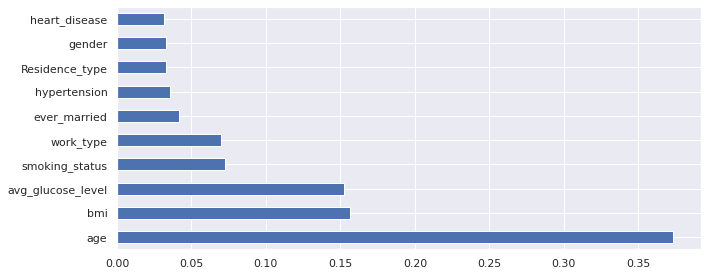

In [ ]:
plt.figure(figsize=(10, 4))

feature_importances.plot(kind='barh')
plt.tight_layout()
plt.show()

### **Tree Based Model Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(random_state=123).fit(X_sstrain, y_sstrain) 
rf.feature_importances_ # (normalized) total reduction of function measuring impurity

array([0.02569404, 0.4012457 , 0.03152746, 0.02162076, 0.02474913,
       0.06207675, 0.02856264, 0.16957596, 0.17933126, 0.0556163 ])

In [ ]:
feature_importances = pd.Series(rf.feature_importances_,index=X_sstrain.columns) 
feature_importances.sort_values(ascending=False).round(3)

age                  0.401
bmi                  0.179
avg_glucose_level    0.170
work_type            0.062
smoking_status       0.056
hypertension         0.032
Residence_type       0.029
gender               0.026
ever_married         0.025
heart_disease        0.022
dtype: float64

[Text(0, 0, 'heart_disease'),
 Text(0, 0, 'ever_married'),
 Text(0, 0, 'gender'),
 Text(0, 0, 'Residence_type'),
 Text(0, 0, 'hypertension'),
 Text(0, 0, 'smoking_status'),
 Text(0, 0, 'work_type'),
 Text(0, 0, 'avg_glucose_level'),
 Text(0, 0, 'bmi'),
 Text(0, 0, 'age')]

Text(0.5, 1.0, 'Random Forest feature importance plot')

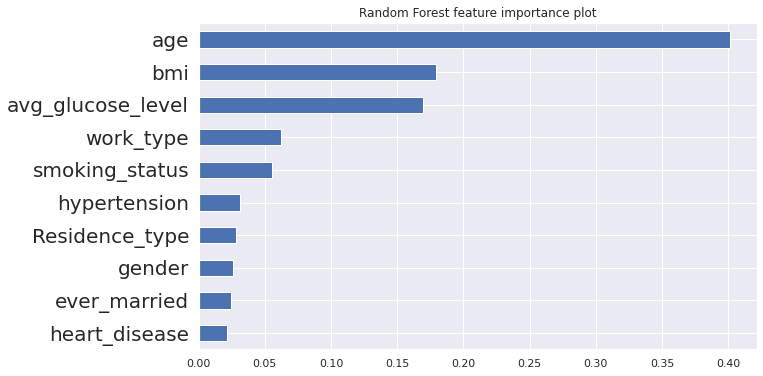

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,6)) 
feature_importances.sort_values().plot.barh(ax=ax); 
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20);
plt.title('Random Forest feature importance plot')


array([0.02730806, 0.42671684, 0.01645291, 0.01230386, 0.02148621,
       0.07785677, 0.02731118, 0.1836479 , 0.15609126, 0.050825  ])

age                  0.427
avg_glucose_level    0.184
bmi                  0.156
work_type            0.078
smoking_status       0.051
Residence_type       0.027
gender               0.027
ever_married         0.021
hypertension         0.016
heart_disease        0.012
dtype: float64

[Text(0, 0, 'heart_disease'),
 Text(0, 0, 'hypertension'),
 Text(0, 0, 'ever_married'),
 Text(0, 0, 'gender'),
 Text(0, 0, 'Residence_type'),
 Text(0, 0, 'smoking_status'),
 Text(0, 0, 'work_type'),
 Text(0, 0, 'bmi'),
 Text(0, 0, 'avg_glucose_level'),
 Text(0, 0, 'age')]

Text(0.5, 1.0, 'Random Forest feature importance plot')

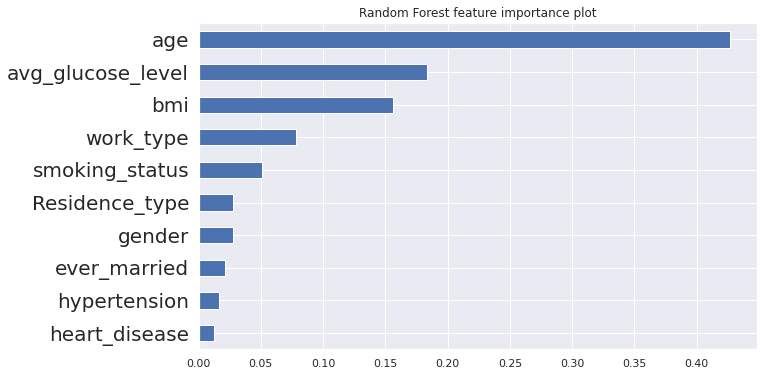

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(random_state=123).fit(X_lstrain, y_lstrain) 
rf.feature_importances_ # (normalized) total reduction of function measuring impurity
feature_importances = pd.Series(rf.feature_importances_,index=X_lstrain.columns) 
feature_importances.sort_values(ascending=False).round(3)
fig,ax = plt.subplots(1,1,figsize=(10,6)) 
feature_importances.sort_values().plot.barh(ax=ax); 
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20);
plt.title('Random Forest feature importance plot')


### **SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel 

sfm = SelectFromModel(logr,
                      threshold=None,
                      prefit=True)

sfm.get_support()
print()
X_sstrain.columns[sfm.get_support()]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status'],
      dtype='object')

In [ ]:
sfm_rf = SelectFromModel(RandomForestClassifier(),
                         threshold='mean',
                         prefit=False
                         ).fit(X_sstrain,y_sstrain)

X_sstrain.columns[sfm_rf.get_support()]

sfm_rf = SelectFromModel(RandomForestClassifier(),threshold='mean')

X_sstrain_subset = sfm_rf.fit_transform(X_sstrain,y_sstrain) 
X_sstest_subset = sfm_rf.transform(X_sstest)

sfm_rf.estimator_.feature_importances_.mean()
print()
feature_importances = pd.Series(sfm_rf.estimator_.feature_importances_,index=X_sstrain.columns) 
feature_importances.sort_values(ascending=False).round(3)

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

0.1

age                  0.401
bmi                  0.182
avg_glucose_level    0.170
work_type            0.059
smoking_status       0.053
hypertension         0.031
Residence_type       0.029
gender               0.028
ever_married         0.025
heart_disease        0.023
dtype: float64

In [ ]:
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

sfm_rf = SelectFromModel(lgbc,
                         threshold='mean',
                         prefit=False).fit(X_lstrain,y_lstrain)

X_sstrain.columns[sfm_rf.get_support()]

sfm_rf = SelectFromModel(RandomForestClassifier(),threshold='mean')

X_sstrain_subset = sfm_rf.fit_transform(X_lstrain,y_lstrain) 
X_sstest_subset = sfm_rf.transform(X_lstest)

sfm_rf.estimator_.feature_importances_.mean()
print()
feature_importances = pd.Series(sfm_rf.estimator_.feature_importances_,index=X_sstrain.columns) 
feature_importances.sort_values(ascending=False).round(3)

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

0.09999999999999999

age                  0.430
avg_glucose_level    0.186
bmi                  0.155
work_type            0.077
smoking_status       0.051
Residence_type       0.027
gender               0.026
ever_married         0.020
hypertension         0.016
heart_disease        0.012
dtype: float64

Get similiar results whatever the estimator is. First 5 features does not change for different normalized data set. 

### **SequentialFeatureSelector**


 In terms of step forward feature selection, the ROC_AUC score is assessed for each feature as it is added to the model, i.e. the features with the highest scores are added to the model. For step backward feature selection, the process is reversed — features are dropped from the model based on those with the lowest ROC_AUC scores. 

In [ ]:
'''
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

forward_feature_selector =  SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           scoring='roc_auc')
           
fselector = forward_feature_selector.fit(X_small, y_small)
'''

"\nfrom sklearn.ensemble import RandomForestRegressor, RandomForestClassifier\nfrom sklearn.metrics import roc_auc_score\n\nforward_feature_selector =  SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),\n           scoring='roc_auc')\n           \nfselector = forward_feature_selector.fit(X_small, y_small)\n"

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_small = small.iloc[:,0:10]
y_small = small['stroke']
X_small_train,X_small_test,y_small_train,y_small_test = train_test_split(X_small,y_small,random_state=0)
'''

"\nfrom sklearn.model_selection import train_test_split\nX_small = small.iloc[:,0:10]\ny_small = small['stroke']\nX_small_train,X_small_test,y_small_train,y_small_test = train_test_split(X_small,y_small,random_state=0)\n"

In [ ]:
'''
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
'''

'\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.svm import SVC\nfrom sklearn.ensemble import RandomForestClassifier, RandomForestRegressor\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import f1_score\n'

In [ ]:
'''
models = [SVC(kernel='linear'),
          SVC(kernel='rbf'),
          SVC(kernel='poly',degree=2),
          RandomForestClassifier(n_jobs=-1,max_depth=10),
          RandomForestClassifier(n_jobs=-1,max_depth=30),
          KNeighborsClassifier(n_neighbors=4),
          KNeighborsClassifier(n_neighbors=8),
          LogisticRegression(),
          GaussianNB()]
names = ["SVM_Linear","SVM_RBF","SVM_Poly2","ShallowForest","DeepForest","4NN","8NN","LogReg", "GaussianNB"]
'''

'\nmodels = [SVC(kernel=\'linear\'),\n          SVC(kernel=\'rbf\'),\n          SVC(kernel=\'poly\',degree=2),\n          RandomForestClassifier(n_jobs=-1,max_depth=10),\n          RandomForestClassifier(n_jobs=-1,max_depth=30),\n          KNeighborsClassifier(n_neighbors=4),\n          KNeighborsClassifier(n_neighbors=8),\n          LogisticRegression(),\n          GaussianNB()]\nnames = ["SVM_Linear","SVM_RBF","SVM_Poly2","ShallowForest","DeepForest","4NN","8NN","LogReg", "GaussianNB"]\n'

In [ ]:
'''
f_scores = pd.DataFrame(np.zeros((len(names),len(names))),columns=names,index=names)
f_data= dict()'
'''

"\nf_scores = pd.DataFrame(np.zeros((len(names),len(names))),columns=names,index=names)\nf_data= dict()'\n"

In [ ]:
'''
for i in range(len(models)):
    sel_name = names[i]
    ffs = SequentialFeatureSelector(direction='forward', n_jobs = -1, estimator=models[i])
    x_ffs = ffs.fit_transform(X_small_train, y_small_train)
    x_tfs = ffs.transform(X_small_test)
    f_data[sel_name] = [x_ffs,x_tfs]
    print(f"Finished Selection with {sel_name}\n")
    print(f"{ffs.n_features_to_select_} Features are Selected:\n{list(X_sstrain.columns[ffs.support_])}\n")
    for j in range(len(models)):
      pred_name = names[j]
      model = models[j]
      model.fit(x_ffs ,y_small_train)
      ypred = model.predict(x_tfs)
      score = f1_score(ypred,y_small_test)
      f_scores.loc[sel_name,pred_name] = score
      print(f"F1_score with {pred_name}: {score}")
  
    print("\n")
  '''

'\nfor i in range(len(models)):\n    sel_name = names[i]\n    ffs = SequentialFeatureSelector(direction=\'forward\', n_jobs = -1, estimator=models[i])\n    x_ffs = ffs.fit_transform(X_small_train, y_small_train)\n    x_tfs = ffs.transform(X_small_test)\n    f_data[sel_name] = [x_ffs,x_tfs]\n    print(f"Finished Selection with {sel_name}\n")\n    print(f"{ffs.n_features_to_select_} Features are Selected:\n{list(X_sstrain.columns[ffs.support_])}\n")\n    for j in range(len(models)):\n      pred_name = names[j]\n      model = models[j]\n      model.fit(x_ffs ,y_small_train)\n      ypred = model.predict(x_tfs)\n      score = f1_score(ypred,y_small_test)\n      f_scores.loc[sel_name,pred_name] = score\n      print(f"F1_score with {pred_name}: {score}")\n  \n    print("\n")\n  '

In [ ]:
'''
plt.figure(figsize=(20,8))
sns.heatmap(f_scores,cmap="BuGn",annot=True, annot_kws={'fontsize':20},cbar=False)
plt.title("F1 Scores with Forward Feature Selection\n",fontsize=35)
plt.xlabel("Predictive Model",fontsize=20)
plt.ylabel("Model Used for Selection",fontsize=25)
plt.show()
'''

'\nplt.figure(figsize=(20,8))\nsns.heatmap(f_scores,cmap="BuGn",annot=True, annot_kws={\'fontsize\':20},cbar=False)\nplt.title("F1 Scores with Forward Feature Selection\n",fontsize=35)\nplt.xlabel("Predictive Model",fontsize=20)\nplt.ylabel("Model Used for Selection",fontsize=25)\nplt.show()\n'

### **Feature Selection Summary**


1. PCA
> The first two principal components can cumulatively capture only 31.4% of the total variance in the input feature space, while first five components can explain only about 88% of the total variance. We cannot get a significant reduction of feature space for predictive modelling without a significant loss of variance in the data. Hence, we use first five principal components for predictive modelling of stroke occurrence.
2. LASSO
> 'age', 'work_type', 'smoking_status'
3. Recursive Feature Elimination
> SS: 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status'   
> LS: 'age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level'
4. Univariate Selection
> SS: 'age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'ever_married'    
> LS: 'age', 'avg_glucose_level', 'gender', 'work_type', 'Residence_type'

5. ExtraTreesClassifier feature importance / Tree Based Model Feature Importance / SelectFromModel
> 'age', 'bmi', 'avg_glucose_level', 'smoking_status', 'work_type'




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( random_state=0)
rf.fit(X_sstrain, y_sstrain)
rf.score(X_sstest,y_sstest)

RandomForestClassifier(random_state=0)

0.848

In [ ]:
rf_pred = rf.predict(X_sstest)
print("Rf Accuracy:",metrics.accuracy_score(y_sstest, rf_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, rf_pred))
print("\033[1m--------------------------------------------------------\033[0m")

NameError: ignored

# **Model Selection and Comparison**

## **Before Feature Selection**

### **Logistic Regression**




In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics   


lr = LogisticRegression().fit(X_sstrain, y_sstrain)
lr_y_pred = lr.predict(X_sstest)
print("LR Accuracy:",metrics.accuracy_score(y_sstest, lr_y_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, lr_y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 


clf = DecisionTreeClassifier().fit(X_sstrain, y_sstrain)
tree_y_pred = clf.predict(X_sstest)
print("DecisionTree Accuracy:",metrics.accuracy_score(y_sstest, tree_y_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, tree_y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

### **KNN**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset


knn = KNeighborsClassifier().fit(X_sstrain, y_sstrain)
knn_y_pred = knn.predict(X_sstest)
print("KNN Accuracy:",metrics.accuracy_score(y_sstest, knn_y_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, knn_y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

### **SVM**

In [ ]:
from sklearn.svm import SVC


svc = SVC().fit(X_sstrain, y_sstrain)
svm_y_pred = svc.predict(X_sstest)
print("SVM Accuracy:",metrics.accuracy_score(y_sstest, svm_y_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, svm_y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

### **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


ada = AdaBoostClassifier().fit(X_sstrain, y_sstrain)
ada_y_pred = ada.predict(X_sstest)
print("ADA Accuracy:",metrics.accuracy_score(y_sstest, ada_y_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB


gaussian = GaussianNB().fit(X_sstrain, y_sstrain)
gaussian_y_pred = gaussian.predict(X_sstest)
print("GaussianNB Accuracy:",metrics.accuracy_score(y_sstest, gaussian_y_pred))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

## **After Feature Selection**

### **Training Set Preparation**

1. PCA
> first five principal components


In [ ]:
X_sstrain["PC1"], X_sstrain["PC2"], X_sstrain["PC3"], X_sstrain["PC4"], X_sstrain["PC5"] = X_ssreduced[:,0], X_ssreduced[:,1], X_ssreduced[:,2], X_ssreduced[:,3], X_ssreduced[:,4]
X_sstest["PC1"], X_sstest["PC2"], X_sstest["PC3"], X_sstest["PC4"], X_sstest["PC5"] = X_ssreduced_test[:,0], X_ssreduced_test[:,1], X_ssreduced_test[:,2], X_ssreduced_test[:,3], X_ssreduced_test[:,4]

In [ ]:
X_sstrain_pca = X_sstrain.loc[:, ['PC1', 'PC2', "PC3", 'PC4', 'PC5']]
X_sstest_pca = X_sstest.loc[:, ['PC1', 'PC2', "PC3", 'PC4', 'PC5']]

2. LASSO
> 'age', 'work_type', 'smoking_status'



In [ ]:
X_sstrain_lasso = X_sstrain.loc[:, ['age', 'work_type', 'smoking_status']]
X_sstest_lasso = X_sstest.loc[:, ['age', 'work_type', 'smoking_status']]

X_lstrain_lasso = X_lstrain.loc[:, ['age', 'work_type', 'smoking_status']]
X_lstest_lasso = X_lstest.loc[:, ['age', 'work_type', 'smoking_status']]

3. Recursive Feature Elimination

> SS: 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status'  

> LS: 'age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level'


In [ ]:
X_sstrain_recursive = X_sstrain.loc[:, ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']]
X_sstest_recursive = X_sstest.loc[:, ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']]

X_lstrain_recursive = X_lstrain.loc[:, ['age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level']]
X_lstest_recursive = X_lstest.loc[:, ['age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level']]

4. Univariate Selection
> 'age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'ever_married'


In [ ]:
X_sstrain_uni = X_sstrain.loc[:, ['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'ever_married']]
X_sstest_uni = X_sstest.loc[:, ['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'ever_married']]

X_lstrain_uni = X_lstrain.loc[:, ['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'ever_married']]
X_lstest_uni = X_lstest.loc[:, ['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'ever_married']]

5. ExtraTreesClassifier feature importance / Tree Based Model Feature Importance / SelectFromModel
> 'age', 'bmi', 'avg_glucose_level', 'smoking_status', 'work_type'


In [ ]:
X_sstrain_tree = X_sstrain.loc[:, ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']]
X_sstest_tree = X_sstest.loc[:, ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']]

X_lstrain_tree = X_lstrain.loc[:, ['age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level']]
X_lstest_tree = X_lstest.loc[:, ['age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level']]

### **Logistic Regression**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics   


# PCA
pca = LogisticRegression().fit(X_sstrain_pca, y_sstrain)
log_y_pred_pca = pca.predict(X_sstest_pca)
print("PCA Accuracy:",metrics.accuracy_score(y_sstest, log_y_pred_pca))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, log_y_pred_pca))
print("\033[1m--------------------------------------------------------\033[0m")

# Lasso
lasso = LogisticRegression().fit(X_sstrain_lasso, y_sstrain)
log_y_pred_lasso = lasso.predict(X_sstest_lasso)
print("Lasso Accuracy:",metrics.accuracy_score(y_sstest, log_y_pred_lasso))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, log_y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")

# Recursive
recursive = LogisticRegression().fit(X_sstrain_recursive, y_sstrain)
log_y_pred_recursive = recursive.predict(X_sstest_recursive)
print("Recursive Accuracy:",metrics.accuracy_score(y_sstest, log_y_pred_recursive))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, log_y_pred_recursive))
print("\033[1m--------------------------------------------------------\033[0m")

# Univariate
uni = LogisticRegression().fit(X_sstrain_uni, y_sstrain)
log_y_pred_uni = uni.predict(X_sstest_uni)
print("Univariate Accuracy:",metrics.accuracy_score(y_sstest, log_y_pred_uni))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, log_y_pred_uni))
print("\033[1m--------------------------------------------------------\033[0m")

# Tree based selection
tree = LogisticRegression().fit(X_sstrain_tree, y_sstrain)
log_y_pred_tree = tree.predict(X_sstest_tree)
print("Tree Accuracy:",metrics.accuracy_score(y_sstest, log_y_pred_tree))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, log_y_pred_tree))
print("\033[1m--------------------------------------------------------\033[0m")

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 


# PCA
pca = DecisionTreeClassifier().fit(X_sstrain_pca, y_sstrain)
dt_y_pred_pca = pca.predict(X_sstest_pca)
print("PCA Accuracy:",metrics.accuracy_score(y_sstest, dt_y_pred_pca))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, dt_y_pred_pca))
print("\033[1m--------------------------------------------------------\033[0m")

# Lasso
lasso = DecisionTreeClassifier().fit(X_sstrain_lasso, y_sstrain)
dt_y_pred_lasso = lasso.predict(X_sstest_lasso)
print("Lasso Accuracy:",metrics.accuracy_score(y_sstest, dt_y_pred_lasso))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, dt_y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")

# Recursive
recursive = DecisionTreeClassifier().fit(X_sstrain_recursive, y_sstrain)
dt_y_pred_recursive = recursive.predict(X_sstest_recursive)
print("Recursive Accuracy:",metrics.accuracy_score(y_sstest, dt_y_pred_recursive))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, dt_y_pred_recursive))
print("\033[1m--------------------------------------------------------\033[0m")

# Univariate
uni = DecisionTreeClassifier().fit(X_sstrain_uni, y_sstrain)
dt_y_pred_uni = uni.predict(X_sstest_uni)
print("Univariate Accuracy:",metrics.accuracy_score(y_sstest, dt_y_pred_uni))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, dt_y_pred_uni))
print("\033[1m--------------------------------------------------------\033[0m")

# Tree based selection
tree = DecisionTreeClassifier().fit(X_sstrain_tree, y_sstrain)
dt_y_pred_tree = tree.predict(X_sstest_tree)
print("Tree Accuracy:",metrics.accuracy_score(y_sstest, dt_y_pred_tree))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, dt_y_pred_tree))
print("\033[1m--------------------------------------------------------\033[0m")

In [ ]:
feature_cols = ['age', 'work_type', 'smoking_status']
X = X_sstrain_lasso[feature_cols]

### **KNN**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset


# PCA
pca = KNeighborsClassifier().fit(X_sstrain_pca, y_sstrain)
knn_y_pred_pca = pca.predict(X_sstest_pca)
print("PCA Accuracy:",metrics.accuracy_score(y_sstest, knn_y_pred_pca))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, knn_y_pred_pca))
print("\033[1m--------------------------------------------------------\033[0m")

# Lasso
lasso = KNeighborsClassifier().fit(X_sstrain_lasso, y_sstrain)
knn_y_pred_lasso = lasso.predict(X_sstest_lasso)
print("Lasso Accuracy:",metrics.accuracy_score(y_sstest, knn_y_pred_lasso))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, knn_y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")

# Recursive
recursive = KNeighborsClassifier().fit(X_sstrain_recursive, y_sstrain)
knn_y_pred_recursive = recursive.predict(X_sstest_recursive)
print("Recursive Accuracy:",metrics.accuracy_score(y_sstest, knn_y_pred_recursive))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, knn_y_pred_recursive))
print("\033[1m--------------------------------------------------------\033[0m")

# Univariate
uni = KNeighborsClassifier().fit(X_sstrain_uni, y_sstrain)
knn_y_pred_uni = uni.predict(X_sstest_uni)
print("Univariate Accuracy:",metrics.accuracy_score(y_sstest, knn_y_pred_uni))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, knn_y_pred_uni))
print("\033[1m--------------------------------------------------------\033[0m")

# Tree based selection
tree = KNeighborsClassifier().fit(X_sstrain_tree, y_sstrain)
knn_y_pred_tree = tree.predict(X_sstest_tree)
print("Tree Accuracy:",metrics.accuracy_score(y_sstest, knn_y_pred_tree))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, knn_y_pred_tree))
print("\033[1m--------------------------------------------------------\033[0m")

### **SVM**

In [ ]:
from sklearn.svm import SVC


# PCA
pca = SVC().fit(X_sstrain_pca, y_sstrain)
svm_y_pred_pca = pca.predict(X_sstest_pca)
print("PCA Accuracy:",metrics.accuracy_score(y_sstest, svm_y_pred_pca))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, svm_y_pred_pca))
print("\033[1m--------------------------------------------------------\033[0m")

# Lasso
lasso = SVC().fit(X_sstrain_lasso, y_sstrain)
svm_y_pred_lasso = lasso.predict(X_sstest_lasso)
print("Lasso Accuracy:",metrics.accuracy_score(y_sstest, svm_y_pred_lasso))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, svm_y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")

# Recursive
recursive = SVC().fit(X_sstrain_recursive, y_sstrain)
svm_y_pred_recursive = recursive.predict(X_sstest_recursive)
print("Recursive Accuracy:",metrics.accuracy_score(y_sstest, svm_y_pred_recursive))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, svm_y_pred_recursive))
print("\033[1m--------------------------------------------------------\033[0m")

# Univariate
uni = SVC().fit(X_sstrain_uni, y_sstrain)
svm_y_pred_uni = uni.predict(X_sstest_uni)
print("Univariate Accuracy:",metrics.accuracy_score(y_sstest, svm_y_pred_uni))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, svm_y_pred_uni))
print("\033[1m--------------------------------------------------------\033[0m")

# Tree based selection
tree = SVC().fit(X_sstrain_tree, y_sstrain)
svm_y_pred_tree = tree.predict(X_sstest_tree)
print("Tree Accuracy:",metrics.accuracy_score(y_sstest, svm_y_pred_tree))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, svm_y_pred_tree))
print("\033[1m--------------------------------------------------------\033[0m")

### **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


# PCA
pca = AdaBoostClassifier().fit(X_sstrain_pca, y_sstrain)
ada_y_pred_pca = pca.predict(X_sstest_pca)
print("PCA Accuracy:",metrics.accuracy_score(y_sstest, ada_y_pred_pca))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred_pca))
print("\033[1m--------------------------------------------------------\033[0m")

# Lasso
lasso = AdaBoostClassifier().fit(X_sstrain_lasso, y_sstrain)
ada_y_pred_lasso = lasso.predict(X_sstest_lasso)
print("Lasso Accuracy:",metrics.accuracy_score(y_sstest, ada_y_pred_lasso))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")

# Recursive
recursive = AdaBoostClassifier().fit(X_sstrain_recursive, y_sstrain)
ada_y_pred_recursive = recursive.predict(X_sstest_recursive)
print("Recursive Accuracy:",metrics.accuracy_score(y_sstest, ada_y_pred_recursive))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred_recursive))
print("\033[1m--------------------------------------------------------\033[0m")

# Univariate
uni = AdaBoostClassifier().fit(X_sstrain_uni, y_sstrain)
ada_y_pred_uni = uni.predict(X_sstest_uni)
print("Univariate Accuracy:",metrics.accuracy_score(y_sstest, ada_y_pred_uni))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred_uni))
print("\033[1m--------------------------------------------------------\033[0m")

# Tree based selection
tree = AdaBoostClassifier().fit(X_sstrain_tree, y_sstrain)
ada_y_pred_tree = tree.predict(X_sstest_tree)
print("Tree Accuracy:",metrics.accuracy_score(y_sstest, ada_y_pred_tree))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, ada_y_pred_tree))
print("\033[1m--------------------------------------------------------\033[0m")

### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB


# PCA
pca = GaussianNB().fit(X_sstrain_pca, y_sstrain)
nb_y_pred_pca = pca.predict(X_sstest_pca)
print("PCA Accuracy:",metrics.accuracy_score(y_sstest, nb_y_pred_pca))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, nb_y_pred_pca))
print("\033[1m--------------------------------------------------------\033[0m")

# Lasso
lasso = GaussianNB().fit(X_sstrain_lasso, y_sstrain)
nb_y_pred_lasso = lasso.predict(X_sstest_lasso)
print("Lasso Accuracy:",metrics.accuracy_score(y_sstest, nb_y_pred_lasso))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, nb_y_pred_lasso))
print("\033[1m--------------------------------------------------------\033[0m")

# Recursive
recursive = GaussianNB().fit(X_sstrain_recursive, y_sstrain)
nb_y_pred_recursive = recursive.predict(X_sstest_recursive)
print("Recursive Accuracy:",metrics.accuracy_score(y_sstest, nb_y_pred_recursive))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, nb_y_pred_recursive))
print("\033[1m--------------------------------------------------------\033[0m")

# Univariate
uni = GaussianNB().fit(X_sstrain_uni, y_sstrain)
nb_y_pred_uni = uni.predict(X_sstest_uni)
print("Univariate Accuracy:",metrics.accuracy_score(y_sstest, nb_y_pred_uni))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, nb_y_pred_uni))
print("\033[1m--------------------------------------------------------\033[0m")

# Tree based selection
tree = GaussianNB().fit(X_sstrain_tree, y_sstrain)
nb_y_pred_tree = tree.predict(X_sstest_tree)
print("Tree Accuracy:",metrics.accuracy_score(y_sstest, nb_y_pred_tree))

print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_sstest, nb_y_pred_tree))
print("\033[1m--------------------------------------------------------\033[0m")

### **Model Comparison**

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
table = [['Model/Feature Selection Tool', 'Full Model', 'PCA', 'LASSO', 'Recursive', 'Univariate', 'Tree Based Selection'],
['Logistic Regression', metrics.accuracy_score(y_sstest, lr_y_pred),metrics.accuracy_score(y_sstest, log_y_pred_pca), metrics.accuracy_score(y_sstest, log_y_pred_lasso), metrics.accuracy_score(y_sstest, log_y_pred_recursive), metrics.accuracy_score(y_sstest, log_y_pred_uni), metrics.accuracy_score(y_sstest, log_y_pred_tree)], 
['Decision Tree', metrics.accuracy_score(y_sstest, tree_y_pred),metrics.accuracy_score(y_sstest, dt_y_pred_pca), metrics.accuracy_score(y_sstest, dt_y_pred_lasso),metrics.accuracy_score(y_sstest, dt_y_pred_recursive),metrics.accuracy_score(y_sstest, dt_y_pred_uni), metrics.accuracy_score(y_sstest, dt_y_pred_tree)], 
['KNN', metrics.accuracy_score(y_sstest, knn_y_pred),metrics.accuracy_score(y_sstest, knn_y_pred_pca), metrics.accuracy_score(y_sstest, knn_y_pred_lasso),metrics.accuracy_score(y_sstest, knn_y_pred_recursive),metrics.accuracy_score(y_sstest, knn_y_pred_uni),metrics.accuracy_score(y_sstest, knn_y_pred_tree)],
['SVM', metrics.accuracy_score(y_sstest, svm_y_pred),metrics.accuracy_score(y_sstest, svm_y_pred_pca), metrics.accuracy_score(y_sstest, svm_y_pred_lasso),metrics.accuracy_score(y_sstest, svm_y_pred_recursive),metrics.accuracy_score(y_sstest, svm_y_pred_uni),metrics.accuracy_score(y_sstest, svm_y_pred_tree)],
['AdaBoost',metrics.accuracy_score(y_sstest, ada_y_pred),metrics.accuracy_score(y_sstest, ada_y_pred_pca),metrics.accuracy_score(y_sstest, ada_y_pred_lasso),metrics.accuracy_score(y_sstest, ada_y_pred_recursive),metrics.accuracy_score(y_sstest, ada_y_pred_uni),metrics.accuracy_score(y_sstest, ada_y_pred_tree)],
['Naive Bayes',metrics.accuracy_score(y_sstest, gaussian_y_pred),metrics.accuracy_score(y_sstest, nb_y_pred_pca),metrics.accuracy_score(y_sstest, nb_y_pred_lasso),metrics.accuracy_score(y_sstest, nb_y_pred_recursive),metrics.accuracy_score(y_sstest, nb_y_pred_uni),metrics.accuracy_score(y_sstest, nb_y_pred_tree)]]


In [ ]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

From the accuracy table above, we can compare the performance of different classifiers when features are selected by different methods.

From the perspective of feature selection, we can see that univariate selection is giving the highest accuracy among all 5 feature selecting methods. Except from logistic regression and decision tree which yield the best results when all 11 features are applied, univariate selected features can give better results when other models are applied. Therefore, the features we choose eventually should be age, avg_glucose_level, heart_disease, hypertension and ever_married.

From the perspective of model selection, we can see that logistic regression with all the features, SVM with univariate features and Naive Bayes with univariate selected features are giving the same accuracy score which is 0.824. Thus, logistic regression, Support Vector Machine and Naive Bayes should be our selected models. 